<a href="https://colab.research.google.com/github/Dan-Analyst/DATA_ANALYSIS_-PROJECTS/blob/main/customerseg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Twitter sent/customer data/customer_data.csv')

# Display the first few rows of the dataframe and summary statistics
print(data.head(10))
print(data.info())
print(data.describe())


   id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4                   5  
<class 'pandas.core.

In [4]:
# Checking for missing values in each column
missing_values = data.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64


In [9]:
# Print all column names in the DataFrame
print(data.columns)


Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')


In [17]:
# Calculate average purchase value using region
average_purchase = data['purchase_amount'].mean()

# Calculate frequency of purchases using region
purchase_frequency = data['id'].count() / data['region'].nunique()

print("Average Purchase Value:", average_purchase)
print("Frequency of Purchases:", purchase_frequency)


Average Purchase Value: 9634.79084
Frequency of Purchases: 25000.0


In [19]:
# Relevant categories to group by
categories = ['region', 'gender', 'education', 'product_category']

# Dictionary to hold results
results = {}

# Calculate average purchase value and frequency of purchases for each category
for category in categories:
    grouped = data.groupby(category)
    average_purchase = grouped['purchase_amount'].mean()
    purchase_frequency = data['id'].count() / grouped['id'].nunique()

    results[category] = {
        "Average Purchase Value": average_purchase,
        "Frequency of Purchases": purchase_frequency
    }

# Display the results
for category, metrics in results.items():
    print(f"Category: {category}")
    print(metrics['Average Purchase Value'])
    print(metrics['Frequency of Purchases'])
    print("\n")

Category: region
region
East     9615.410820
North    9673.361834
South    9648.787077
West     9619.211458
Name: purchase_amount, dtype: float64
region
East     3.325131
North    5.020584
South    4.981816
West     3.340571
Name: id, dtype: float64


Category: gender
gender
Female    9634.404601
Male      9635.178224
Name: purchase_amount, dtype: float64
gender
Female    1.997044
Male      2.002964
Name: id, dtype: float64


Category: education
education
Bachelor      9656.727666
College       9647.306315
HighSchool    9586.708502
Masters       9614.402710
Name: purchase_amount, dtype: float64
education
Bachelor       3.302619
College        2.507900
HighSchool     4.992262
Masters       10.187449
Name: id, dtype: float64


Category: product_category
product_category
Beauty         9721.366038
Books          9592.935678
Clothing       9634.595327
Electronics    9648.226696
Food           9669.953110
Health         9610.963647
Home           9538.173262
Name: purchase_amount, dtype: fl

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features_for_clustering = data[['age', 'income', 'purchase_amount']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Applying K-means clustering with an arbitrary choice of 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the DataFrame
data['Cluster'] = clusters


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


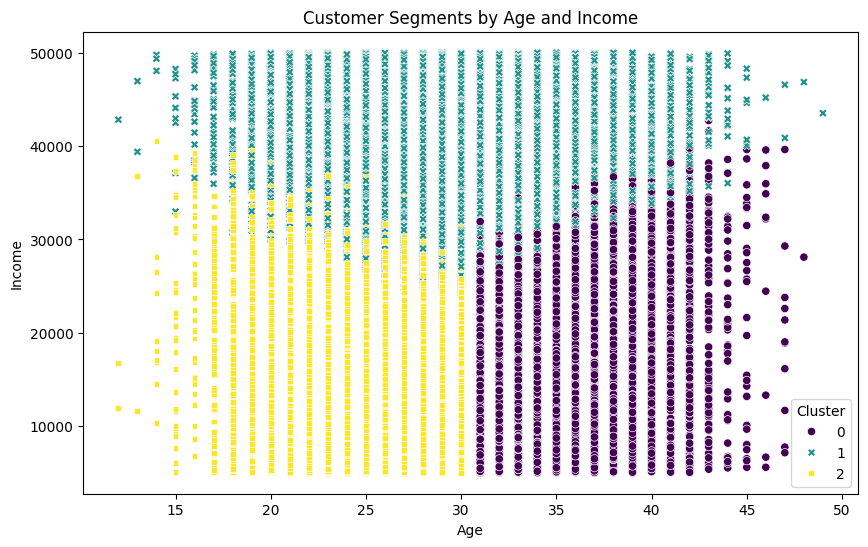

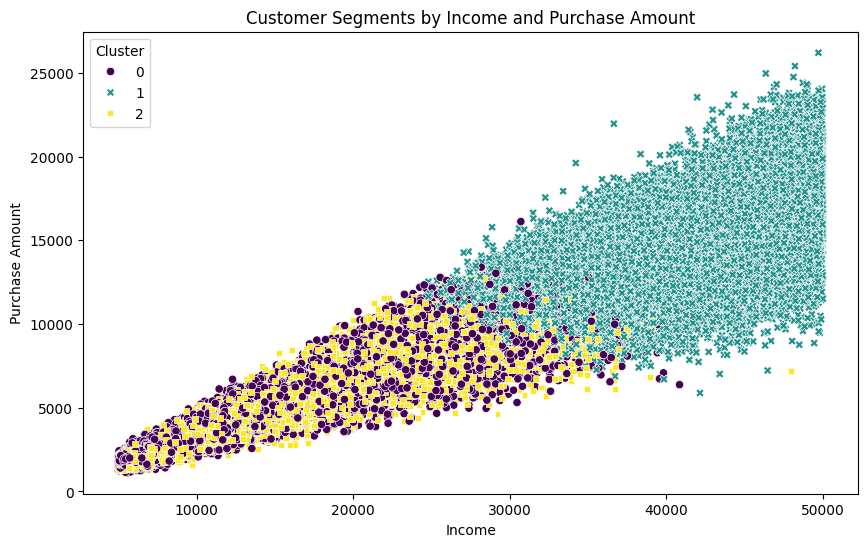

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for clusters based on 'age' and 'income'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='income', hue='Cluster', palette='viridis', style='Cluster', markers=True)
plt.title('Customer Segments by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Scatter plot for clusters based on 'income' and 'purchase_amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='income', y='purchase_amount', hue='Cluster', palette='viridis', style='Cluster', markers=True)
plt.title('Customer Segments by Income and Purchase Amount')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.show()


In [25]:
# Analyze each cluster
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Cluster {cluster} Stats:")
    print(cluster_data.describe())

    # Specific insights
    # Example: Customers in Cluster 0 tend to make more frequent but lower-value purchases.


Cluster 0 Stats:
                  id           age        income  purchase_amount  \
count   26067.000000  26067.000000  26067.000000     26067.000000   
mean    50119.092109     34.140676  18046.436913      6193.666513   
std     28836.637954      2.699389   7802.537928      2696.779916   
min         6.000000     31.000000   5000.000000      1118.000000   
25%     25192.500000     32.000000  11328.500000      3856.500000   
50%     50384.000000     34.000000  17892.000000      6138.000000   
75%     75163.500000     36.000000  24317.500000      8358.500000   
max    100000.000000     48.000000  42740.000000     16119.000000   

       promotion_usage  satisfaction_score  Cluster  
count     26067.000000        26067.000000  26067.0  
mean          0.298884            5.008171      0.0  
std           0.457778            1.036902      0.0  
min           0.000000            1.000000      0.0  
25%           0.000000            4.000000      0.0  
50%           0.000000            5.0